In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys as sys

#Constantes obtidas experimentalmente
M = 2.5
eps = 0.8

def fM(E):
    return E - eps*np.sin(E)

def rsobrea(v):
    rsobrea = (1-pow(eps,2))/(1+eps*np.cos(v))
    return rsobrea

def fv(E):
    tanv2 = np.sqrt((1+eps)/(1-eps))*np.tan(E/2)
    vmeio = np.arctan(tanv2)
    v = vmeio*2
    return v

def fE(a, b, erro, M):

    while (b-a) > erro:
        E = (b+a)/2
        if (fM(a) < M and fM(b) > M and fM(E) > M) or (fM(a) > M and fM(b) < M and fM(E) < M):
            b = E
        elif (fM(a) < M and fM(b) > M and fM(E) < M) or (fM(a) > M and fM(b) < M and fM(E) > M):
            a = E
        else:
            break
    
    return E

    

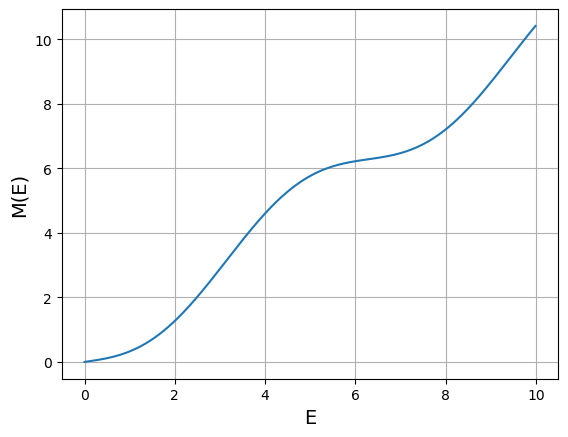

In [4]:
# Gráfico para M(E):
start = int(input('Qual o E de início? '))
end = int(input('Qual o E final?' ))
pres = int(input('Qual a precisão? '))

X = list()

max = abs(start-end)*pres
x = start
for i in range(1, max+1):
    X.append(x)
    x += 1/pres

Y = [fM(i) for i in X]


plt.xlabel("E", fontsize=14)
plt.ylabel("M(E)", fontsize=14)

plt.plot(X,Y)
plt.grid()
plt.show()

In [5]:
###Letra a) Aproximando o valor de E para M = 2.5

# Condições iniciais
erro = 0.00001
a = 2
b = 4
i = 0

# Execução
while (b-a) > erro:
    E = (b+a)/2
    if (fM(a) < 2.5 and fM(b) > 2.5 and fM(E) > 2.5) or (fM(a) > 2.5 and fM(b) < 2.5 and fM(E) < 2.5):
        b = E
    elif (fM(a) < 2.5 and fM(b) > 2.5 and fM(E) < 2.5) or (fM(a) > 2.5 and fM(b) < 2.5 and fM(E) > 2.5):
        a = E
    else:
        print(f'Iteração {i} ; E = {E} ; M(E) = {fM(E)} ; b-a = {b-a}')
        sys.exit()

    i += 1
    print(f'Iteração {i} ; E = {E} ; M(E) = {fM(E)} ; b-a = {b-a}')

Iteração 1 ; E = 3.0 ; M(E) = 2.887103993552106 ; b-a = 1.0
Iteração 2 ; E = 2.5 ; M(E) = 2.021222284716835 ; b-a = 0.5
Iteração 3 ; E = 2.75 ; M(E) = 2.4446712063581346 ; b-a = 0.25
Iteração 4 ; E = 2.875 ; M(E) = 2.6642432053092633 ; b-a = 0.125
Iteração 5 ; E = 2.8125 ; M(E) = 2.5539523944002505 ; b-a = 0.0625
Iteração 6 ; E = 2.78125 ; M(E) = 2.499174079204317 ; b-a = 0.03125
Iteração 7 ; E = 2.796875 ; M(E) = 2.5265302364039117 ; b-a = 0.015625
Iteração 8 ; E = 2.7890625 ; M(E) = 2.5128437283190443 ; b-a = 0.0078125
Iteração 9 ; E = 2.78515625 ; M(E) = 2.5060067740229033 ; b-a = 0.00390625
Iteração 10 ; E = 2.783203125 ; M(E) = 2.5025898913865126 ; b-a = 0.001953125
Iteração 11 ; E = 2.7822265625 ; M(E) = 2.5008818511398125 ; b-a = 0.0009765625
Iteração 12 ; E = 2.78173828125 ; M(E) = 2.5000279315895746 ; b-a = 0.00048828125
Iteração 13 ; E = 2.781494140625 ; M(E) = 2.4996009969958752 ; b-a = 0.000244140625
Iteração 14 ; E = 2.7816162109375 ; M(E) = 2.4998144621931386 ; b-a = 0.00

In [6]:
### Letra b) parte 1 - Obtendo r/a para M = 2.5:
v = fv(E)
print(v)
ra = rsobrea(v)

print(f"A razão r/a é igual a {ra}")

3.0204701979896296
A razão r/a é igual a 1.7487520436665673


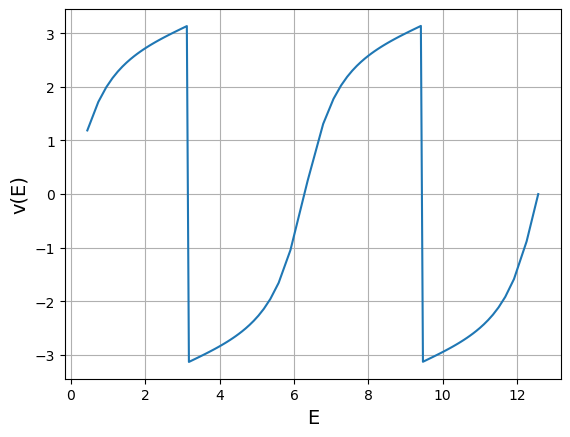

In [7]:
### Letra b) parte 2 - obtendo v para M (0, 4pi]:

# Condições iniciais fixadas
erro = 0.00001
a = 0 #Menor valor de E possível de acordo com o gráfico
b = 14 #Maior valor de E possível de acordo com o gráfico


#Loop para obter todos os valores de E para M no intervalo de (0,4*pi] ao passo de 0.1, incluindo o valor de 4*pi no final do loop

valoresE = []
valoresM = []

for i in range (0,140):  # Intervalo de valores M que contém M (0, 4*pi] indo de 0.1 em 0.1
    M = i/10
    if 0 < M < 4*np.pi:
        valoresM.append(M)
        valoresE.append(fE(a, b, erro, M))

    elif M > 4*np.pi:
        M = 4*np.pi
        valoresM.append(M)
        valoresE.append(fE(a, b, erro, M))
        break
    

#Aplicando os valores de E obtidos para obter os valores de v

valoresv = []

for i in valoresE:
    v = fv(i)
    valoresv.append(v)

#plotando um gráfico E x v(E)!

plt.xlabel("E", fontsize=14)
plt.ylabel("v(E)", fontsize=14)

plt.plot(valoresE,valoresv)
plt.grid()
plt.show()


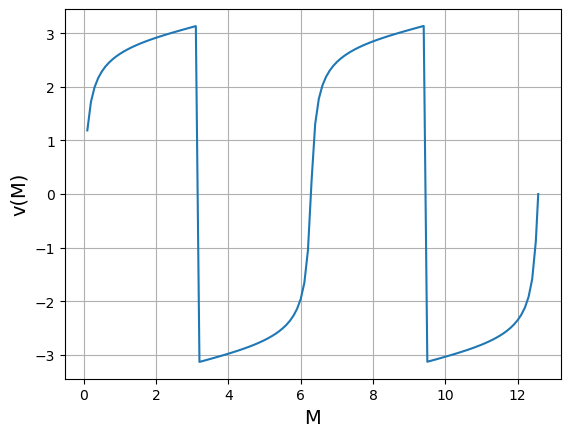

In [8]:
# Gráfico M x v(M):

plt.xlabel("M", fontsize=14)
plt.ylabel("v(M)", fontsize=14)

plt.plot(valoresM,valoresv)
plt.grid()
plt.show()

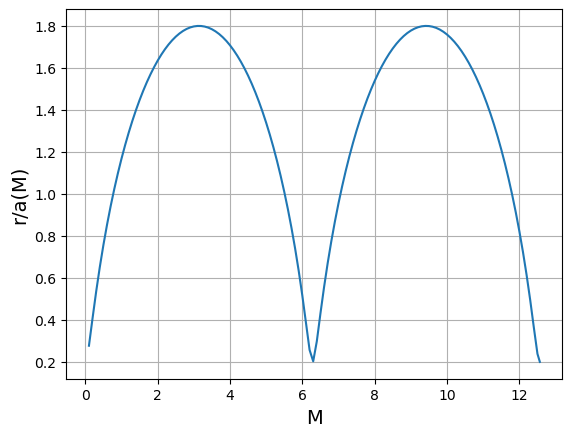

In [9]:
### Letra b) parte 3 - obtendo os valores de r/a em função de M (0, 4pi]

valoresRA = []

for i in valoresv:
    ra = rsobrea(i)
    valoresRA.append(ra)

#Plota o gráfico M x r/a(M)!

plt.xlabel("M", fontsize=14)
plt.ylabel("r/a(M)", fontsize=14)

plt.plot(valoresM,valoresRA)
plt.grid()
plt.show()


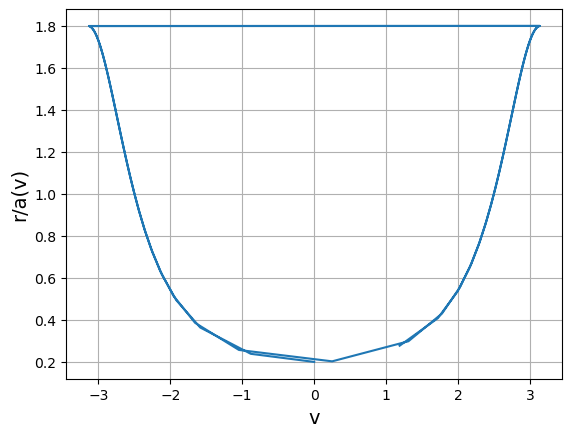

In [10]:
#Gráfico v x r/a(v):

plt.xlabel("v", fontsize=14)
plt.ylabel("r/a(v)", fontsize=14)

plt.plot(valoresv,valoresRA)
plt.grid()
plt.show()